In [1]:
from numpy import dot
from numpy.linalg import norm
import numpy as np
import pandas as pd
from konlpy.tag import Hannanum
from sklearn.feature_extraction.text import CountVectorizer
hannanum = Hannanum()

In [71]:
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline

mpl.rcParams['axes.unicode_minus'] = False

In [72]:
from matplotlib import font_manager, rc
f_path = "C:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=f_path).get_name()
rc('font',family = font_name)

# 유클리디안 거리, 코사인거리 함수 정의

In [2]:
def cos_sim(A, B):
       return dot(A, B)/(norm(A)*norm(B))
def euclidean_distance(x, y):   
    return np.sqrt(np.sum((x - y) ** 2))

# 데이터 불러오기 
* df_stat : 경영학과 데이터
* df_ncs : ncs데이터

In [76]:
df_stat = pd.read_csv('manage+stat+health.csv')
df_stat

,학수번호,과목소개
0,데이 K0040,인터넷프로그래밍 네트워크 프로그래밍 필요 기법들 이해 클라이언트 서버 통신 프로그램...
1,데이 K0047,"선형모형입문 선형모형 확장 선형모형 기본이론 실습 병행 학습 나 중회귀모형, 분산분..."
2,데이 K0056,정보시스템 보안 관리 & 정보시스템 보안 중요성 관리 방법 학습 나 정보시스템 보안...
3,데이 K0045,정보시스템활용 정보시스템 활용 능력 나 정보시스템 활용 능력 향상 사례분석 세미나 ...
4,데이 K0052,생명과학자료분석 의학 유전자 등 생명과학자료 특성 이 관련 통계분석방법 학습 실제 ...
...,...,...
100,보건K0005,의무기록관리학 의무기록관리학 Medical Record Management ...
101,보건K0010,의학용어 의학용어 Medical Terminology 보건 K 자료 모든 ...
102,보건K0044,생활습관병과 영양 성인병과 영양 Adult Diseases and Nutri...
103,보건K0011,보건행정학 보건행정학 Public Health Administration 보...


In [94]:
df_stat = df_stat[df_stat['학수번호'].isin(['데이 K0014','데이 K0058','데이 K0055'])]

In [95]:
df_stat.reset_index(inplace=True,drop=True)
df_stat.head()

,학수번호,과목소개
0,데이 K0055,네트워크 보안 관리 & 네트워크 침입 실질적 위험성 식 네트워크 보안 유지하기 프로...
1,데이 K0014,데이터베이스 개론 데이터베이스 개념 모델링 기법 기본 이론 학습 데이터베이스 전반 ...
2,데이 K0058,데이터베이스 응용 데이터웨어하우스 구축 효과적 의사결정지원 데이터웨어하우스 분석방법...


In [96]:
df_stat.shape

(3, 2)

In [97]:
df_ncs = pd.read_excel('j_ncs.xlsx',encoding='cp949')
df_ncs.head(3)

,jobname,capability
0,3D 프린터 개발,시장 조사하기 법규 검토하기 기술방식 비교하기 기술방식 선정하기 원가 분석하기 개발...
1,3D 프린터용 제품 제작,시장동향 분석하기 수요조사하기 사업성 검토하기 기획ㅈ품 설정하기 디자인 결정하기 출...
2,CAM,작업계획 수립하기 공정 · 작업내용 계획하기 장비 · 인원 배분하기 도면 결정하기 ...


In [98]:
df_ncs = df_ncs[df_ncs['jobname'].isin([ '크루즈운영관리', '소방시설설계·감리','DB엔지니어링','정보시스템운영','보안엔지니어링','NW엔지니어링','IT시스템관리'
])]

In [99]:
df_ncs.reset_index(inplace=True,drop=True)
df_ncs.head()

,jobname,capability
0,DB엔지니어링,데이터 요구사항 수집하기 데이터 요구사항 분석하기 데이터 요구사항 정의하기 데이터 ...
1,IT시스템관리,운영 목표수립 관리하기 운영 개선과제 관리하기 예산 비용 관리하기 인적자원 관리하기...
2,NW엔지니어링,기술트렌드 분석하기 거시시장환경 분석하기 경쟁환경 분석하기 프로토콜 명세서 분석하기...
3,보안엔지니어링,보안 환경 분석하기 보안 범위 설정하기 보안 목표 수립하기 자산 식별하기 자산 분석...
4,소방시설설계·감리,설계공정표 작성하기 투입인력계획서 작성하기 성과물 목록표 작성하기 품질관리계획서 작...


In [100]:
df_ncs.shape[0]

7

# heatmap을 만들 빈 데이터 프레임 만들기
* 37x241
* np.randn을 사용해서 난수로 빈데이터프레임을 만들었습니다.

In [101]:
df = pd.DataFrame( np.random.randn(df_stat.shape[0],df_ncs.shape[0]),index=list(df_stat['학수번호']), columns=list(df_ncs['jobname']))

In [102]:
df.head()

,DB엔지니어링,IT시스템관리,NW엔지니어링,보안엔지니어링,소방시설설계·감리,정보시스템운영,크루즈운영관리
데이 K0055,1.069761,0.844396,0.464276,-0.887505,1.211622,0.340410,-0.899340
데이 K0014,0.412390,0.398890,-0.071898,-1.876747,-0.584309,0.578671,-0.693217
데이 K0058,0.399397,1.293435,0.763394,0.353822,-0.453708,0.620976,-0.222257


In [103]:
df.shape

(3, 7)

# BoW 언어모델 만들기

In [104]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()

# 직무 241개와 과목 37개의 유사도를 구해 DF로 저장

In [105]:
df_ncs.iloc[0,1]

'데이터 요구사항 수집하기 데이터 요구사항 분석하기 데이터 요구사항 정의하기 데이터 요구사항 검증하기 주제영역 정의하기 핵심개체 정의하기 핵심관계 정의하기 개념 E-R 다이어그램 작성하기 개념 데이터모델 품질검증하기 개체 상세화하기 관계 상세화하기 논리 E-R 다이어그램 작성하기 데이터베이스 정규화하기 논리 데이터모델 품질검증하기 물리요소 조사 분석하기 데이터베이스 물리속성 설계하기 물리 E-R 다이어그램 작성하기 데이터베이스 반정규화하기 물리데이터 모델 품질검토하기 DBMS(Data Base Management System) 설치하기 데이터베이스 생성하기 데이터베이스 오브젝트 생성하기 데이터 품질정책 수립하기 데이터 품질 진단하기 데이터 품질 개선하기 데이터 품질관리 프로세스 정의하기 데이터 전환계획 수립하기 데이터 전환 설계하기 데이터 전환 프로그램 구현하기 데이터 정제하기 데이터 전환 수행하기 성능 분석하기 성능개선하기 성능개선결과 평가하기 데이터 표준화 정책수립하기 데이터 표준 정의하기 데이터 표준 관리하기 기본 SQL 작성하기 고급 SQL 작성하기 절차형 SQL 작성하기 응용 SQL 작성하기 '

In [118]:
for r in range(df_stat.shape[0]):
    for k in range(0,df_ncs.shape[0]):
        X = np.array(cv.fit_transform([df_stat.iloc[r,1], df_ncs.iloc[k,1]]).todense())
        num =cos_sim(X[0], X[1])
        df.iloc[r,k] = num
        print(num)

0.004432422071779362
0.2168883135176733
0.410159443668885
0.2653724462171376
0.017978438802402942
0.11835627543284946
0.010331399964032522
0.195585634354174
0.0036046862545529527
0.03475754285057939
0.10408763704854128
0.0019588121854142377
0.14144553702849885
0.0025326927893910395
0.03178654601301551
0.008787495503274935
0.07262730392025629
0.01268722959391102
0.002387593823088841
0.04862783973148857
0.006174192405743998


In [119]:
df.index = ['네트워크 보안 및 관리','데이터베이스 개론','데이터베이스 응용']
df

,DB엔지니어링,IT시스템관리,NW엔지니어링,보안엔지니어링,소방시설설계·감리,정보시스템운영,크루즈운영관리
네트워크 보안 및 관리,0.004432,0.216888,0.410159,0.265372,0.017978,0.118356,0.010331
데이터베이스 개론,0.195586,0.003605,0.034758,0.104088,0.001959,0.141446,0.002533
데이터베이스 응용,0.031787,0.008787,0.072627,0.012687,0.002388,0.048628,0.006174


# hipmap그리기 
* 경고문 없애는 코드 넣어야함
* 소수점이 달라도 다르게 보이게 바꾸거나 ncs데이터를 유사도가 높게 나오도록 바꾸어야 할 듯

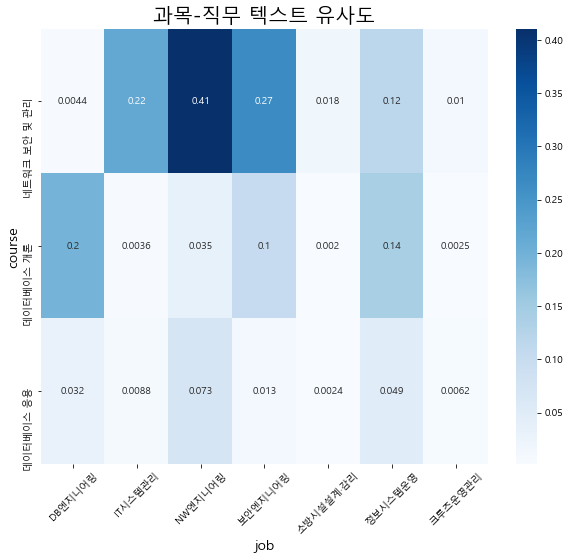

In [140]:
import matplotlib.pyplot as plt

import seaborn as sns


#sns.heatmap(df, cmap='RdYlGn_r',annot=True)
#sns.heatmap(df, cmap='YlGnBu',annot=True)
#sns.heatmap(df, cmap='viridis',annot=True)
sns.heatmap(df, cmap=matplotlib.cm.Blues,annot=True)
plt.rcParams['figure.figsize'] = [10, 8]


plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns,rotation=45)

plt.yticks(np.arange(0.5, len(df.index), 1), df.index)

plt.title('과목-직무 텍스트 유사도', fontsize=20)

plt.xlabel('job', fontsize=14)

plt.ylabel('course', fontsize=14)

#plt.colorbar()



plt.show()




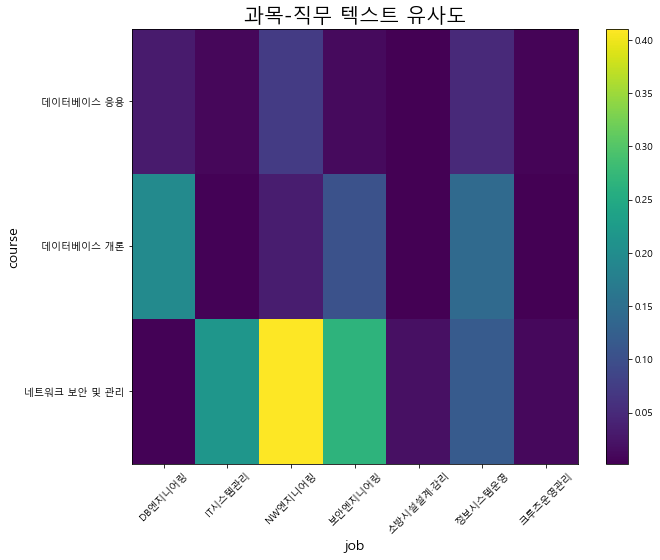

In [123]:
import matplotlib.pyplot as plt

import seaborn as sns


plt.rcParams['figure.figsize'] = [10, 8]

plt.pcolor(df)

plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns,rotation=45)

plt.yticks(np.arange(0.5, len(df.index), 1), df.index)

plt.title('과목-직무 텍스트 유사도', fontsize=20)

plt.xlabel('job', fontsize=14)

plt.ylabel('course', fontsize=14)

plt.colorbar()



plt.show()


